# Neural Networks: A Comprehensive Guide for Beginners 🧠

```
    🧠 Neural Network Structure 🧠
    
  Input Layer    Hidden Layers    Output Layer
      O              O    O           O
      O          →   O    O       →   O
      O              O    O           O
                     O    O
```

## Welcome to the World of Neural Networks!

Neural networks are one of the most powerful and exciting technologies in modern machine learning and artificial intelligence. They're inspired by how the human brain works and have revolutionized fields like:

- **Image Recognition** 📸 (recognizing faces, objects, medical scans)  
- **Natural Language Processing** 💬 (chatbots, translation, text analysis)
- **Speech Recognition** 🎙️ (voice assistants like Siri, Alexa)
- **Autonomous Systems** 🚗 (self-driving cars, robotics)

## What You'll Learn

By the end of this notebook, you'll understand:
- ✅ The mathematical foundations (scalars, vectors, matrices, tensors)
- ✅ How neural networks work (forward and backward propagation)
- ✅ Gradient descent and optimization
- ✅ Building neural networks with Keras
- ✅ Practical implementation and evaluation

Let's embark on this exciting journey together! 🚀

## 1. Import Required Libraries 📚

Before we dive into neural networks, let's import all the necessary libraries we'll need throughout this tutorial.

In [ ]:
# Core libraries for numerical computing and data manipulation
import numpy as np
import pandas as pd

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

# Machine learning libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import make_classification

# Deep learning with Keras/TensorFlow (with error handling)
try:
    import tensorflow as tf
    from tensorflow import keras
    from tensorflow.keras import layers, models, optimizers
    from tensorflow.keras.utils import to_categorical
    tensorflow_available = True
    print("✅ TensorFlow imported successfully!")
except ImportError as e:
    print("⚠️ TensorFlow not available. Some sections will be skipped.")
    print(f"Error: {e}")
    tensorflow_available = False

# Set random seeds for reproducibility
np.random.seed(42)
if tensorflow_available:
    tf.random.set_seed(42)

# Configure matplotlib for inline plotting
%matplotlib inline
plt.style.use('seaborn-v0_8')

print("🎉 Core libraries imported successfully!")
if tensorflow_available:
    print(f"TensorFlow version: {tf.__version__}")
print(f"NumPy version: {np.__version__}")
print(f"Pandas version: {pd.__version__}")

✅ TensorFlow imported successfully!
🎉 Core libraries imported successfully!
TensorFlow version: 2.19.0
NumPy version: 2.0.2
Pandas version: 2.2.2


## 2. Understanding Basic Mathematical Entities 🔢

Before diving into neural networks, we need to understand the fundamental mathematical building blocks. Think of these as the "LEGO blocks" that build neural networks!

```
Mathematical Building Blocks:
┌─────────┬─────────┬─────────┬─────────┐
│ Scalar  │ Vector  │ Matrix  │ Tensor  │
│   42    │ [1,2,3] │[1 2 3]  │   🧊    │
│         │         │[4 5 6]  │ N-dim   │
└─────────┴─────────┴─────────┴─────────┘
```

### 2.1 Scalars (Just a Single Number)
A **scalar** is simply a single number. Examples:
- Temperature: 25°C
- Age: 30 years
- Price: $100

In [ ]:
# Creating scalars in Python
temperature = 25.5
age = 30
price = 100.0

print("Examples of Scalars:")
print(f"🌡️  Temperature: {temperature}°C")
print(f"👤 Age: {age} years")
print(f"💰 Price: ${price}")

# In NumPy, scalars are 0-dimensional arrays
scalar_np = np.array(42)
print(f"\nNumPy scalar: {scalar_np}")
print(f"Shape of scalar: {scalar_np.shape}")
print(f"Number of dimensions: {scalar_np.ndim}")

Examples of Scalars:
🌡️  Temperature: 25.5°C
👤 Age: 30 years
💰 Price: $100.0

NumPy scalar: 42
Shape of scalar: ()
Number of dimensions: 0


### 2.2 Vectors (List of Numbers)
A **vector** is an array of numbers arranged in order. Think of it as a list of related values:
- Student grades: [85, 92, 78, 88]
- Coordinates: [x=3, y=4, z=5]
- Features of a house: [bedrooms=3, bathrooms=2, area=1500]

Examples of Vectors:
📊 Student grades: [85 92 78 88]
📍 3D coordinates: [3 4 5]
🏠 House features: [   3    2 1500]

Vector properties:
Shape of grades vector: (4,)
Length of coordinates vector: 3
Dimensions: 1

Accessing elements:
First grade: 85
Last coordinate: 5
House area: 1500


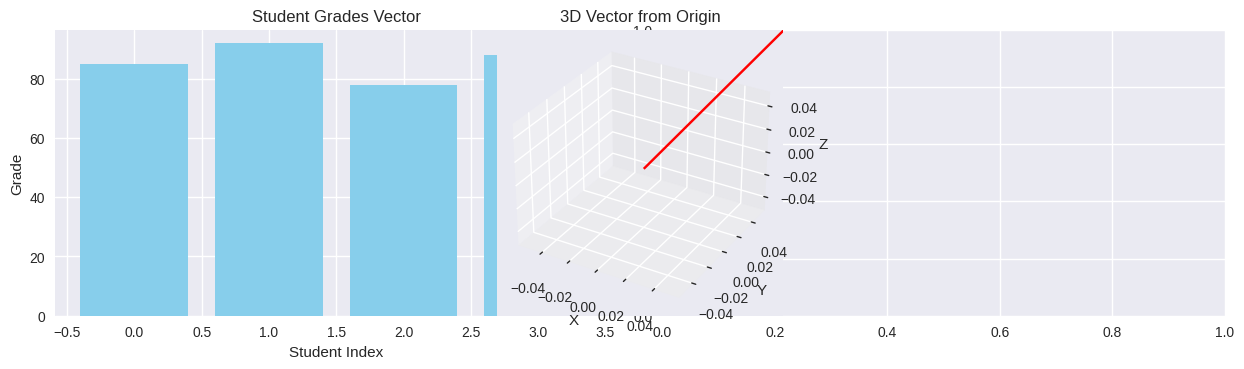

In [ ]:
# Creating vectors in Python
student_grades = np.array([85, 92, 78, 88])
coordinates = np.array([3, 4, 5])
house_features = np.array([3, 2, 1500])  # bedrooms, bathrooms, area

print("Examples of Vectors:")
print(f"📊 Student grades: {student_grades}")
print(f"📍 3D coordinates: {coordinates}")
print(f"🏠 House features: {house_features}")

print(f"\nVector properties:")
print(f"Shape of grades vector: {student_grades.shape}")
print(f"Length of coordinates vector: {len(coordinates)}")
print(f"Dimensions: {coordinates.ndim}")

# Accessing individual elements (indexing)
print(f"\nAccessing elements:")
print(f"First grade: {student_grades[0]}")
print(f"Last coordinate: {coordinates[-1]}")
print(f"House area: {house_features[2]}")

# Vector visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# 1D vector as bar plot
ax1.bar(range(len(student_grades)), student_grades, color='skyblue')
ax1.set_title('Student Grades Vector')
ax1.set_xlabel('Student Index')
ax1.set_ylabel('Grade')

# 3D vector as arrow from origin
ax2 = plt.axes(projection='3d')
ax2.quiver(0, 0, 0, coordinates[0], coordinates[1], coordinates[2],
           color='red', arrow_length_ratio=0.1)
ax2.set_title('3D Vector from Origin')
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_zlabel('Z')

plt.tight_layout()
plt.show()

### 2.3 Matrices (2D Tables of Numbers)
A **matrix** is like a spreadsheet or table with rows and columns. Each element can be accessed using (row, column) position:
- Spreadsheet of student data
- Image pixels (grayscale image = matrix of brightness values)
- Game board (chess, tic-tac-toe)

Examples of Matrices:
📊 Student Scores Matrix:
   Math  Sci  Eng
S1  [85 90 78]
S2  [92 88 85]
S3  [78 82 90]
S4  [88 95 82]

Matrix properties:
Shape: (4, 3) (4 rows, 3 columns)
Total elements: 12
Dimensions: 2

Accessing elements:
Student 1's Math score: 85
Student 3's English score: 90
All Math scores: [85 92 78 88]
Student 2's all scores: [92 88 85]


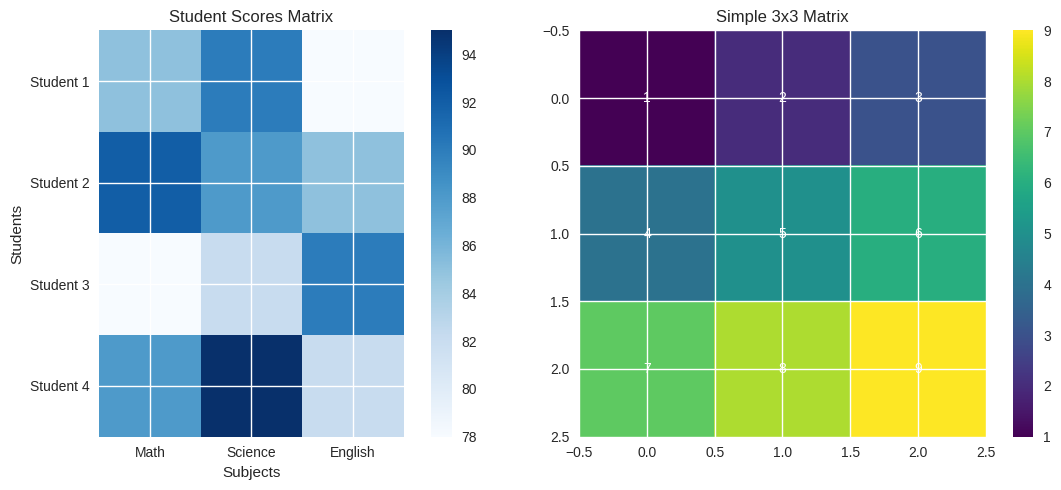

In [ ]:
# Creating matrices in Python
# Student data: [Math, Science, English] for 4 students
student_scores = np.array([
    [85, 90, 78],  # Student 1
    [92, 88, 85],  # Student 2
    [78, 82, 90],  # Student 3
    [88, 95, 82]   # Student 4
])

# A simple 3x3 matrix
simple_matrix = np.array([
    [1, 2, 3],
    [4, 5, 6],
    [7, 8, 9]
])

print("Examples of Matrices:")
print("📊 Student Scores Matrix:")
print("   Math  Sci  Eng")
for i, scores in enumerate(student_scores):
    print(f"S{i+1}  {scores}")

print(f"\nMatrix properties:")
print(f"Shape: {student_scores.shape} (4 rows, 3 columns)")
print(f"Total elements: {student_scores.size}")
print(f"Dimensions: {student_scores.ndim}")

# Matrix indexing
print(f"\nAccessing elements:")
print(f"Student 1's Math score: {student_scores[0, 0]}")
print(f"Student 3's English score: {student_scores[2, 2]}")
print(f"All Math scores: {student_scores[:, 0]}")
print(f"Student 2's all scores: {student_scores[1, :]}")

# Matrix visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Heatmap of student scores
im1 = ax1.imshow(student_scores, cmap='Blues')
ax1.set_title('Student Scores Matrix')
ax1.set_xlabel('Subjects')
ax1.set_ylabel('Students')
ax1.set_xticks([0, 1, 2])
ax1.set_xticklabels(['Math', 'Science', 'English'])
ax1.set_yticks([0, 1, 2, 3])
ax1.set_yticklabels(['Student 1', 'Student 2', 'Student 3', 'Student 4'])
plt.colorbar(im1, ax=ax1)

# Simple matrix visualization
im2 = ax2.imshow(simple_matrix, cmap='viridis')
ax2.set_title('Simple 3x3 Matrix')
for i in range(3):
    for j in range(3):
        ax2.text(j, i, simple_matrix[i, j], ha='center', va='center', color='white')
plt.colorbar(im2, ax=ax2)

plt.tight_layout()
plt.show()

### 2.4 Matrix Transpose (Flipping Rows and Columns)
Sometimes we need to "flip" a matrix by swapping rows and columns. This is called **transposition**:

Original Matrix (2x3):
[[1 2 3]
 [4 5 6]]
Shape: (2, 3)

Transposed Matrix (3x2):
[[1 4]
 [2 5]
 [3 6]]
Shape: (3, 2)

Both methods identical: True


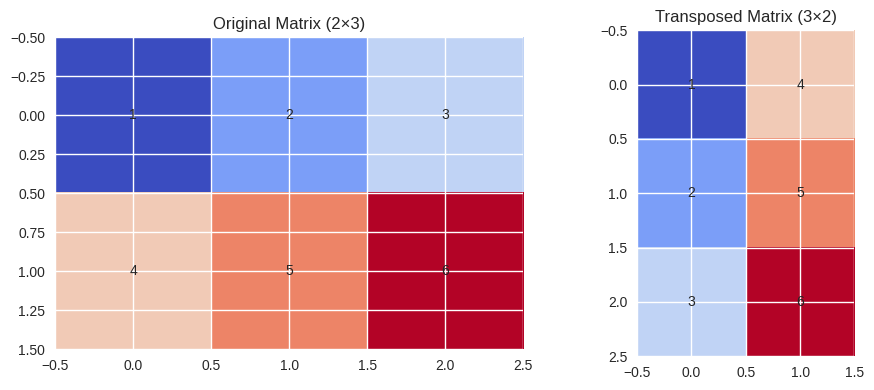

In [ ]:
# Matrix transpose demonstration
original = np.array([
    [1, 2, 3],
    [4, 5, 6]
])

# Two ways to transpose
transposed_1 = original.T
transposed_2 = np.transpose(original)

print("Original Matrix (2x3):")
print(original)
print(f"Shape: {original.shape}")

print("\nTransposed Matrix (3x2):")
print(transposed_1)
print(f"Shape: {transposed_1.shape}")

# Verify both methods give same result
print(f"\nBoth methods identical: {np.array_equal(transposed_1, transposed_2)}")

# Visual representation
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))

# Original matrix
im1 = ax1.imshow(original, cmap='coolwarm')
ax1.set_title('Original Matrix (2×3)')
for i in range(2):
    for j in range(3):
        ax1.text(j, i, original[i, j], ha='center', va='center')

# Transposed matrix
im2 = ax2.imshow(transposed_1, cmap='coolwarm')
ax2.set_title('Transposed Matrix (3×2)')
for i in range(3):
    for j in range(2):
        ax2.text(j, i, transposed_1[i, j], ha='center', va='center')

plt.tight_layout()
plt.show()

### 2.5 Tensors (Multi-dimensional Arrays)
**Tensors** are generalizations of matrices to more dimensions. Think of them as:
- **Scalar** = 0D tensor (just a number)
- **Vector** = 1D tensor (list of numbers)  
- **Matrix** = 2D tensor (table of numbers)
- **Tensor** = 3D+ tensor (cube, hypercube of numbers)

Common examples:
- **3D Tensor**: Color images (height × width × color_channels)
- **4D Tensor**: Video data (time × height × width × color_channels)
- **4D Tensor**: Batch of images (batch_size × height × width × channels)

**RGB Channel**

[255, 0, 0] → bright red

[0, 255, 0] → bright green

[0, 0, 255] → bright blue

[255, 255, 255] → white

[0, 0, 0] → black

🔢 Tensor Examples:
0D Tensor (Scalar): 42
Shape: (), Dimensions: 0

1D Tensor (Vector): [1 2 3 4 5]
Shape: (5,), Dimensions: 1

2D Tensor (Matrix):
[[1 2 3]
 [4 5 6]]
Shape: (2, 3), Dimensions: 2

3D Tensor (RGB Image): Shape: (64, 64, 3), Dimensions: 3
Represents: (Height=64, Width=64, Color_Channels=3)

4D Tensor (Batch of Images): Shape: (32, 64, 64, 3), Dimensions: 4
Represents: (Batch_Size=32, Height=64, Width=64, Color_Channels=3)


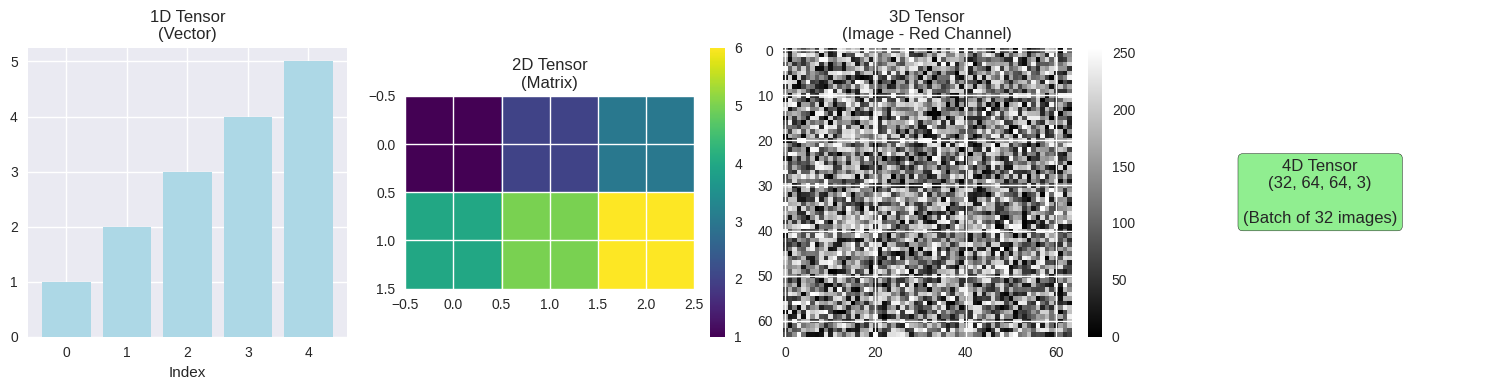

In [ ]:
# Creating tensors of different dimensions
print("🔢 Tensor Examples:")

# 0D tensor (scalar)
tensor_0d = np.array(42)
print(f"0D Tensor (Scalar): {tensor_0d}")
print(f"Shape: {tensor_0d.shape}, Dimensions: {tensor_0d.ndim}")

# 1D tensor (vector)
tensor_1d = np.array([1, 2, 3, 4, 5])
print(f"\n1D Tensor (Vector): {tensor_1d}")
print(f"Shape: {tensor_1d.shape}, Dimensions: {tensor_1d.ndim}")

# 2D tensor (matrix)
tensor_2d = np.array([[1, 2, 3], [4, 5, 6]])
print(f"\n2D Tensor (Matrix):")
print(tensor_2d)
print(f"Shape: {tensor_2d.shape}, Dimensions: {tensor_2d.ndim}")

# 3D tensor (like a color image: height x width x channels)
tensor_3d = np.random.randint(0, 255, size=(64, 64, 3))  # 64x64 RGB image
print(f"\n3D Tensor (RGB Image): Shape: {tensor_3d.shape}, Dimensions: {tensor_3d.ndim}")
print("Represents: (Height=64, Width=64, Color_Channels=3)")

# 4D tensor (batch of images)
tensor_4d = np.random.randint(0, 255, size=(32, 64, 64, 3))  # 32 images of 64x64 RGB
print(f"\n4D Tensor (Batch of Images): Shape: {tensor_4d.shape}, Dimensions: {tensor_4d.ndim}")
print("Represents: (Batch_Size=32, Height=64, Width=64, Color_Channels=3)")

# Visualize the concept
fig = plt.figure(figsize=(15, 4))

# 1D tensor visualization
ax1 = fig.add_subplot(141)
ax1.bar(range(len(tensor_1d)), tensor_1d, color='lightblue')
ax1.set_title('1D Tensor\n(Vector)')
ax1.set_xlabel('Index')

# 2D tensor visualization
ax2 = fig.add_subplot(142)
im2 = ax2.imshow(tensor_2d, cmap='viridis')
ax2.set_title('2D Tensor\n(Matrix)')
plt.colorbar(im2, ax=ax2, fraction=0.046)

# 3D tensor visualization (show one slice)
ax3 = fig.add_subplot(143)
im3 = ax3.imshow(tensor_3d[:,:,0], cmap='gray')  # Show red channel
ax3.set_title('3D Tensor\n(Image - Red Channel)')
plt.colorbar(im3, ax=ax3, fraction=0.046)

# 4D tensor concept
ax4 = fig.add_subplot(144)
ax4.text(0.5, 0.5, f'4D Tensor\n{tensor_4d.shape}\n\n(Batch of {tensor_4d.shape[0]} images)',
         ha='center', va='center', fontsize=12,
         bbox=dict(boxstyle="round,pad=0.3", facecolor="lightgreen"))
ax4.set_xlim(0, 1)
ax4.set_ylim(0, 1)
ax4.axis('off')

plt.tight_layout()
plt.show()

## 3. Neural Network Fundamentals 🧠

Now that we understand the mathematical building blocks, let's explore what neural networks actually are!

```
🧠 NEURAL NETWORK CONCEPT 🧠

Real Brain Neuron:     →     Artificial Neuron:
    
  Dendrites                    Inputs (x₁, x₂, x₃)
     ↓                            ↓
  Cell Body          →         Weights & Bias
     ↓                            ↓  
   Axon                      Activation Function
     ↓                            ↓
  Synapse                       Output
```

### 3.1 What is a Neural Network?

Imagine you're trying to predict ice cream sales based on:
- **Location** (busy street vs quiet area)
- **Price** (expensive vs affordable)  
- **Variety** (many flavors vs few flavors)

A neural network learns complex patterns between these inputs and the sales outcome. It's inspired by how neurons in our brain work!

### 3.2 Key Components

1. **Input Layer** 📥: Where data enters (location, price, variety)
2. **Hidden Layer(s)** 🔒: Where the "magic" happens - learns patterns
3. **Output Layer** 📤: Final prediction (expected sales)
4. **Weights & Biases** ⚖️: Parameters the network learns
5. **Activation Functions** ⚡: Add non-linearity (help learn complex patterns)

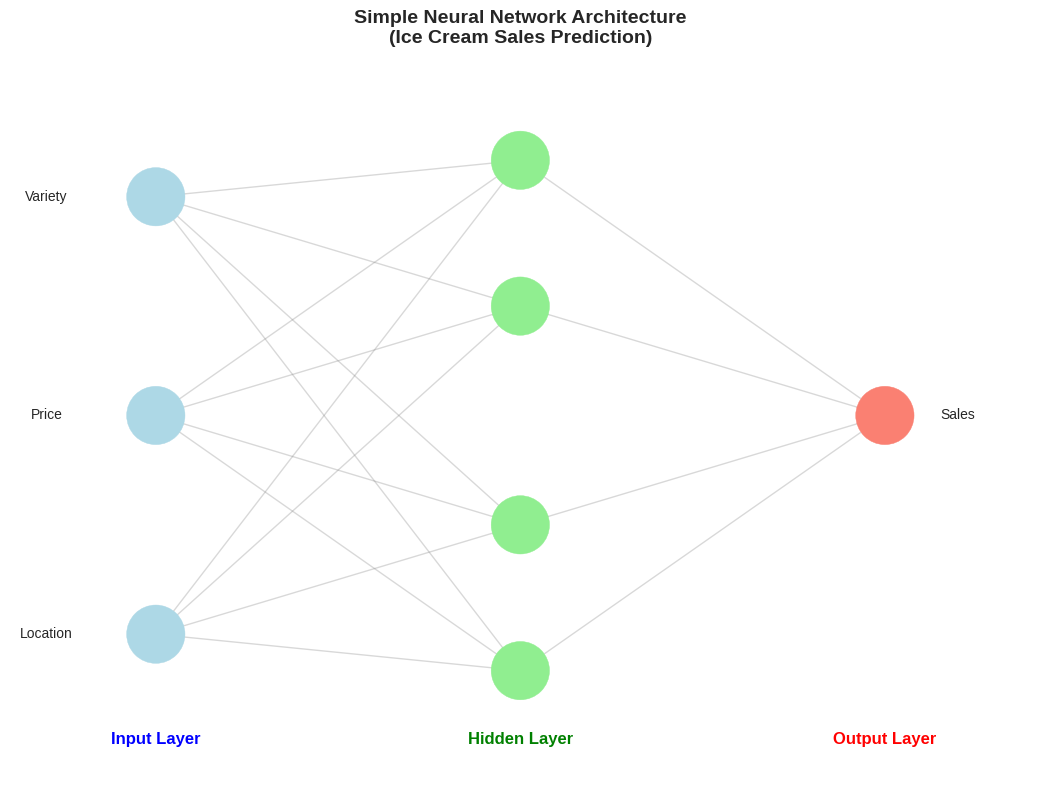

🧠 Neural Network Components:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
📥 Input Layer: Receives raw data (location, price, variety)
🔒 Hidden Layer: Learns complex patterns and relationships
📤 Output Layer: Makes the final prediction (sales)
⚖️  Weights: Connection strengths between neurons
⚡ Activation: Functions that add non-linearity


In [ ]:
# Let's create a visual representation of a simple neural network
fig, ax = plt.subplots(figsize=(12, 8))

# Define positions for nodes
input_nodes = [(0, 0.2), (0, 0.5), (0, 0.8)]
hidden_nodes = [(0.5, 0.15), (0.5, 0.35), (0.5, 0.65), (0.5, 0.85)]
output_nodes = [(1, 0.5)]

# Draw connections (simplified - showing some connections)
for inp in input_nodes:
    for hid in hidden_nodes:
        ax.plot([inp[0], hid[0]], [inp[1], hid[1]], 'gray', alpha=0.3, linewidth=1)

for hid in hidden_nodes:
    for out in output_nodes:
        ax.plot([hid[0], out[0]], [hid[1], out[1]], 'gray', alpha=0.3, linewidth=1)

# Draw nodes
for i, pos in enumerate(input_nodes):
    circle = plt.Circle(pos, 0.04, color='lightblue', zorder=3)
    ax.add_patch(circle)
    labels = ['Location', 'Price', 'Variety']
    ax.text(pos[0]-0.15, pos[1], labels[i], fontsize=10, ha='center', va='center')

for pos in hidden_nodes:
    circle = plt.Circle(pos, 0.04, color='lightgreen', zorder=3)
    ax.add_patch(circle)

for pos in output_nodes:
    circle = plt.Circle(pos, 0.04, color='salmon', zorder=3)
    ax.add_patch(circle)
    ax.text(pos[0]+0.1, pos[1], 'Sales', fontsize=10, ha='center', va='center')

# Add layer labels
ax.text(0, 0.05, 'Input Layer', fontsize=12, ha='center', weight='bold', color='blue')
ax.text(0.5, 0.05, 'Hidden Layer', fontsize=12, ha='center', weight='bold', color='green')
ax.text(1, 0.05, 'Output Layer', fontsize=12, ha='center', weight='bold', color='red')

ax.set_xlim(-0.2, 1.2)
ax.set_ylim(0, 1)
ax.set_aspect('equal')
ax.axis('off')
ax.set_title('Simple Neural Network Architecture\n(Ice Cream Sales Prediction)', fontsize=14, weight='bold')

plt.tight_layout()
plt.show()

print("🧠 Neural Network Components:")
print("━" * 40)
print("📥 Input Layer: Receives raw data (location, price, variety)")
print("🔒 Hidden Layer: Learns complex patterns and relationships")
print("📤 Output Layer: Makes the final prediction (sales)")
print("⚖️  Weights: Connection strengths between neurons")
print("⚡ Activation: Functions that add non-linearity")

### 3.3 Activation Functions ⚡

Activation functions are crucial for neural networks. They decide whether a neuron should be activated or not. Think of them as "decision makers" at each neuron.

**Common Activation Functions:**
- **Sigmoid** 📈: Squashes values between 0 and 1 (good for probabilities)
- **ReLU** 🚀: Simple and effective - outputs 0 for negative inputs, keeps positive as-is  
- **Tanh** 🌊: Squashes values between -1 and 1

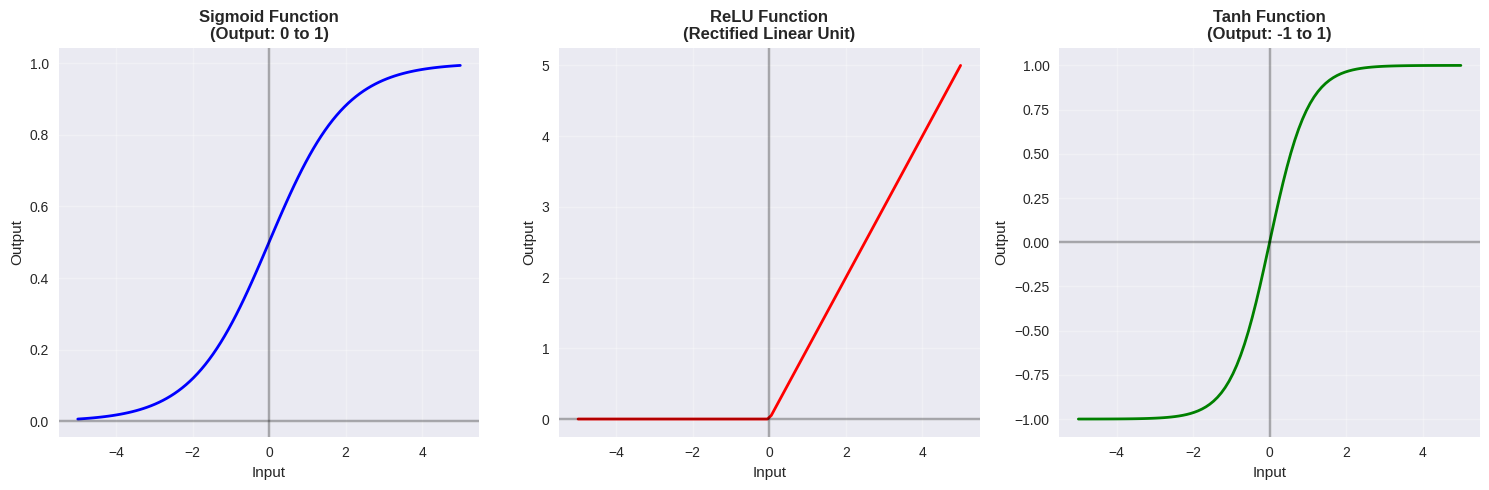

📊 Activation Function Examples:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Input: -2 → Sigmoid: 0.119, ReLU: 0.000, Tanh: -0.964
Input: -1 → Sigmoid: 0.269, ReLU: 0.000, Tanh: -0.762
Input:  0 → Sigmoid: 0.500, ReLU: 0.000, Tanh: 0.000
Input:  1 → Sigmoid: 0.731, ReLU: 1.000, Tanh: 0.762
Input:  2 → Sigmoid: 0.881, ReLU: 2.000, Tanh: 0.964

🎯 Key Properties:
• Sigmoid: Good for binary classification (probability output)
• ReLU: Most popular for hidden layers (fast, simple)
• Tanh: Zero-centered output (good for some applications)


In [ ]:
# Define and visualize common activation functions
x = np.linspace(-5, 5, 100)

# Sigmoid function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# ReLU function
def relu(x):
    return np.maximum(0, x)

# Tanh function
def tanh(x):
    return np.tanh(x)

# Create visualizations
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Sigmoid
axes[0].plot(x, sigmoid(x), 'b-', linewidth=2, label='Sigmoid')
axes[0].set_title('Sigmoid Function\n(Output: 0 to 1)', fontweight='bold')
axes[0].grid(True, alpha=0.3)
axes[0].set_xlabel('Input')
axes[0].set_ylabel('Output')
axes[0].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[0].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# ReLU
axes[1].plot(x, relu(x), 'r-', linewidth=2, label='ReLU')
axes[1].set_title('ReLU Function\n(Rectified Linear Unit)', fontweight='bold')
axes[1].grid(True, alpha=0.3)
axes[1].set_xlabel('Input')
axes[1].set_ylabel('Output')
axes[1].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[1].axvline(x=0, color='k', linestyle='-', alpha=0.3)

# Tanh
axes[2].plot(x, tanh(x), 'g-', linewidth=2, label='Tanh')
axes[2].set_title('Tanh Function\n(Output: -1 to 1)', fontweight='bold')
axes[2].grid(True, alpha=0.3)
axes[2].set_xlabel('Input')
axes[2].set_ylabel('Output')
axes[2].axhline(y=0, color='k', linestyle='-', alpha=0.3)
axes[2].axvline(x=0, color='k', linestyle='-', alpha=0.3)

plt.tight_layout()
plt.show()

# Show numerical examples
print("📊 Activation Function Examples:")
print("━" * 50)
test_inputs = [-2, -1, 0, 1, 2]

for i, val in enumerate(test_inputs):
    sig_out = sigmoid(val)
    relu_out = relu(val)
    tanh_out = tanh(val)
    print(f"Input: {val:2.0f} → Sigmoid: {sig_out:.3f}, ReLU: {relu_out:.3f}, Tanh: {tanh_out:.3f}")

print("\n🎯 Key Properties:")
print("• Sigmoid: Good for binary classification (probability output)")
print("• ReLU: Most popular for hidden layers (fast, simple)")
print("• Tanh: Zero-centered output (good for some applications)")

## 4. Gradient Descent and Partial Derivatives 📉

Neural networks learn through an optimization process called **gradient descent**. Think of it like finding the bottom of a valley while blindfolded!

![Gradient Descent](https://miro.medium.com/max/1400/0*rBQI7uBhBKE8KT-X.png)

### 4.1 The Valley Analogy 🏔️

Imagine you're standing on a hillside in thick fog, trying to reach the bottom:
- **Cost Function**: The height of the hill (we want to minimize this)
- **Current Position**: Our current model parameters (weights & biases)
- **Gradient**: The steepest direction upward (we go opposite direction - downward)
- **Step Size**: How big steps we take (learning rate)

### 4.2 Why Do We Need Gradients?

In neural networks, we have many parameters (sometimes millions!). We need to know:
- Which direction to adjust each parameter to reduce error
- How much to adjust each parameter

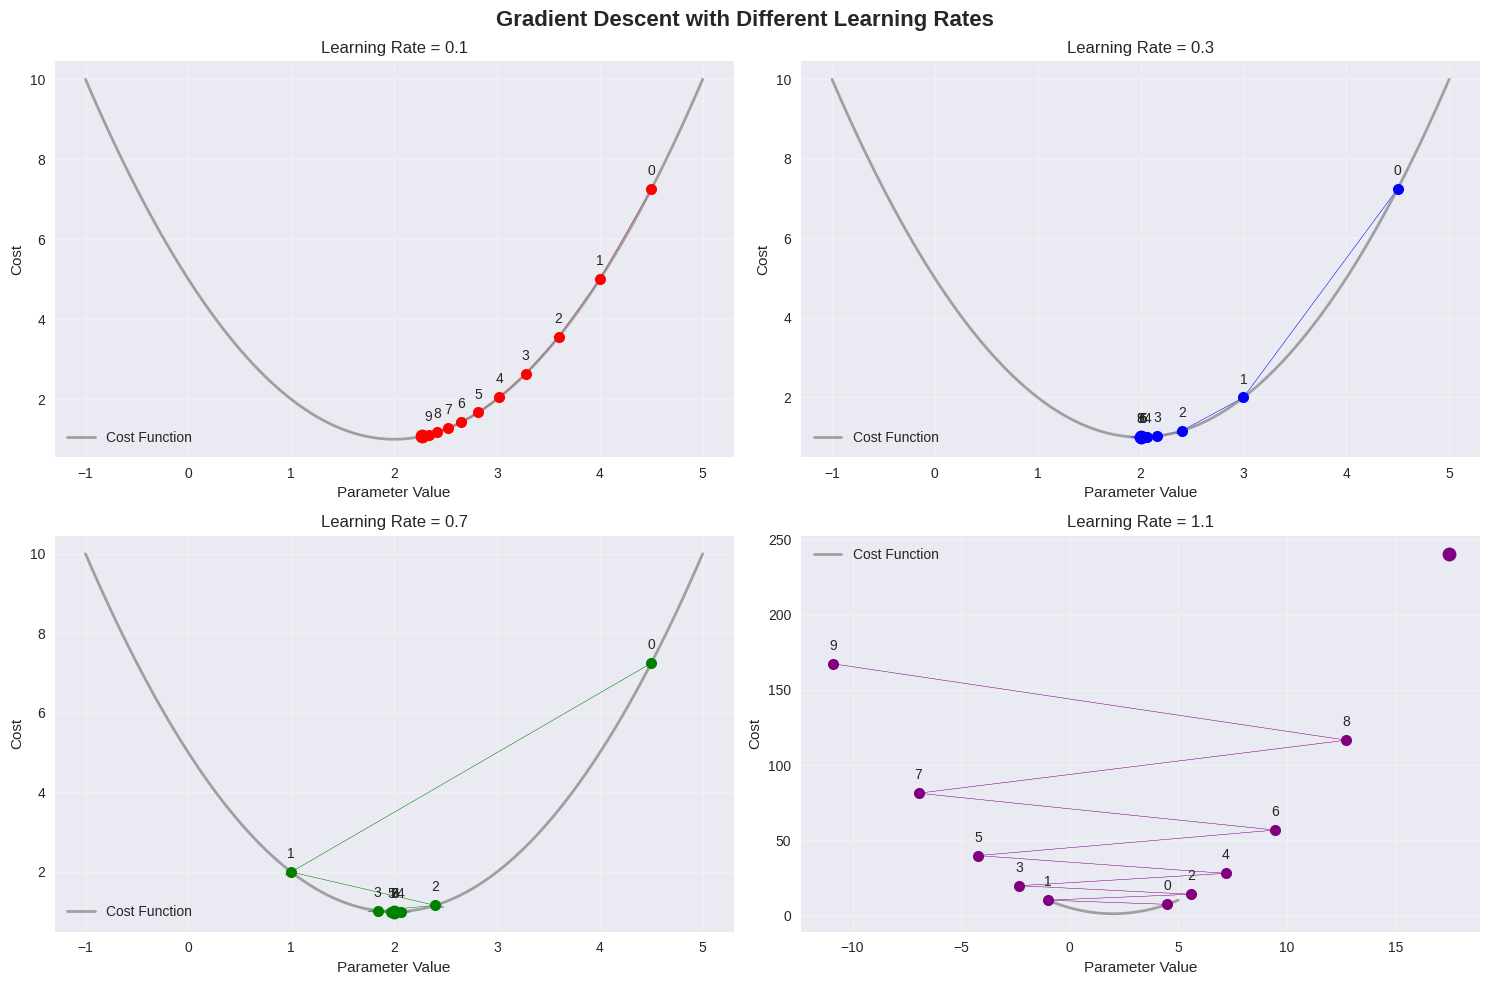

🎯 Key Observations:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
• Learning Rate 0.1: Slow but steady convergence
• Learning Rate 0.3: Good balance - converges nicely
• Learning Rate 0.7: Still converges but bigger steps
• Learning Rate 1.1: Too large! Overshoots and diverges


In [ ]:
# Simple 1D gradient descent visualization
def simple_cost_function(x):
    """A simple quadratic cost function"""
    return (x - 2) ** 2 + 1

def cost_derivative(x):
    """Derivative of our cost function"""
    return 2 * (x - 2)

# Gradient descent implementation
def gradient_descent_1d(start_x, learning_rate, iterations):
    x = start_x
    history = [x]
    costs = [simple_cost_function(x)]

    for i in range(iterations):
        gradient = cost_derivative(x)
        x = x - learning_rate * gradient
        history.append(x)
        costs.append(simple_cost_function(x))

    return history, costs

# Run gradient descent with different learning rates
x_range = np.linspace(-1, 5, 100)
y_range = simple_cost_function(x_range)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

learning_rates = [0.1, 0.3, 0.7, 1.1]
colors = ['red', 'blue', 'green', 'purple']

for idx, (lr, color) in enumerate(zip(learning_rates, colors)):
    ax = axes[idx // 2, idx % 2]

    # Plot cost function
    ax.plot(x_range, y_range, 'gray', linewidth=2, alpha=0.7, label='Cost Function')

    # Run gradient descent
    history, costs = gradient_descent_1d(start_x=4.5, learning_rate=lr, iterations=10)

    # Plot the path
    for i in range(len(history) - 1):
        ax.plot(history[i], simple_cost_function(history[i]), 'o', color=color, markersize=8)
        ax.annotate(f'{i}', (history[i], simple_cost_function(history[i])),
                   textcoords="offset points", xytext=(0,10), ha='center')

        # Add arrow to show direction
        if i < len(history) - 2:
            ax.arrow(history[i], simple_cost_function(history[i]),
                    history[i+1] - history[i],
                    simple_cost_function(history[i+1]) - simple_cost_function(history[i]),
                    head_width=0.1, head_length=0.1, fc=color, ec=color, alpha=0.6)

    ax.plot(history[-1], simple_cost_function(history[-1]), 'o', color=color, markersize=10)
    ax.set_title(f'Learning Rate = {lr}')
    ax.set_xlabel('Parameter Value')
    ax.set_ylabel('Cost')
    ax.grid(True, alpha=0.3)
    ax.legend()

plt.suptitle('Gradient Descent with Different Learning Rates', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("🎯 Key Observations:")
print("━" * 40)
print("• Learning Rate 0.1: Slow but steady convergence")
print("• Learning Rate 0.3: Good balance - converges nicely")
print("• Learning Rate 0.7: Still converges but bigger steps")
print("• Learning Rate 1.1: Too large! Overshoots and diverges")

### 4.3 Partial Derivatives in 3D 🌄

When we have multiple parameters (like weight and bias), we need **partial derivatives**. Think of it as:
- Standing on a 3D hill
- Checking the slope in the x-direction (∂f/∂x)
- Checking the slope in the y-direction (∂f/∂y)
- Moving in the direction of steepest descent (negative gradient)

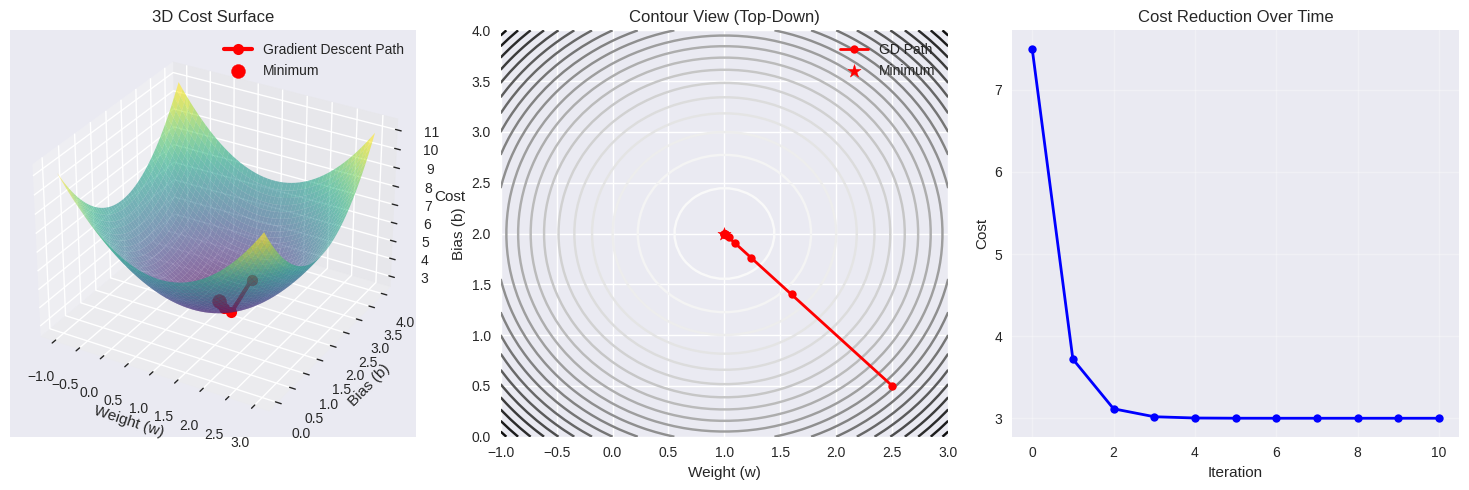

📈 Gradient Descent Progress:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Step Weight(w)  Bias(b)    Cost       ∂f/∂w    ∂f/∂b   
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
0    2.500      0.500      7.500      3.000    -3.000  
1    1.600      1.400      3.720      1.200    -1.200  
2    1.240      1.760      3.115      0.480    -0.480  
3    1.096      1.904      3.018      0.192    -0.192  
4    1.038      1.962      3.003      0.077    -0.077  
5    1.015      1.985      3.000      0.031    -0.031  

🎯 Key Concepts:
• Partial derivatives tell us the slope in each parameter direction
• We move opposite to the gradient (downhill)
• The path spirals toward the minimum at (w=1, b=2)


In [ ]:
# 3D Gradient Descent Visualization
def cost_function_3d(w, b):
    """Simple 3D cost function: f(w,b) = (w-1)² + (b-2)² + 3"""
    return (w - 1)**2 + (b - 2)**2 + 3

def compute_gradients(w, b):
    """Compute partial derivatives"""
    dw = 2 * (w - 1)  # ∂f/∂w
    db = 2 * (b - 2)  # ∂f/∂b
    return dw, db

# Create 3D surface
w_range = np.linspace(-1, 3, 50)
b_range = np.linspace(0, 4, 50)
W, B = np.meshgrid(w_range, b_range)
Z = cost_function_3d(W, B)

# Gradient descent in 3D
def gradient_descent_3d(start_w, start_b, learning_rate, iterations):
    w, b = start_w, start_b
    path = [(w, b, cost_function_3d(w, b))]

    for i in range(iterations):
        dw, db = compute_gradients(w, b)
        w = w - learning_rate * dw
        b = b - learning_rate * db
        path.append((w, b, cost_function_3d(w, b)))

    return path

# Create 3D visualization
fig = plt.figure(figsize=(15, 5))

# Left plot: 3D surface with gradient descent path
ax1 = fig.add_subplot(131, projection='3d')
surf = ax1.plot_surface(W, B, Z, cmap='viridis', alpha=0.6)
ax1.set_xlabel('Weight (w)')
ax1.set_ylabel('Bias (b)')
ax1.set_zlabel('Cost')
ax1.set_title('3D Cost Surface')

# Run gradient descent and plot path
path = gradient_descent_3d(start_w=2.5, start_b=0.5, learning_rate=0.3, iterations=10)
path_w = [point[0] for point in path]
path_b = [point[1] for point in path]
path_cost = [point[2] for point in path]

ax1.plot(path_w, path_b, path_cost, 'ro-', markersize=8, linewidth=3, label='Gradient Descent Path')
ax1.scatter([1], [2], [3], color='red', s=100, label='Minimum')
ax1.legend()

# Middle plot: Contour view (top-down)
ax2 = fig.add_subplot(132)
contours = ax2.contour(W, B, Z, levels=20)
ax2.plot(path_w, path_b, 'ro-', markersize=6, linewidth=2, label='GD Path')
ax2.scatter([1], [2], color='red', s=100, marker='*', label='Minimum')
ax2.set_xlabel('Weight (w)')
ax2.set_ylabel('Bias (b)')
ax2.set_title('Contour View (Top-Down)')
ax2.legend()

# Right plot: Cost vs iterations
ax3 = fig.add_subplot(133)
ax3.plot(range(len(path_cost)), path_cost, 'b-o', linewidth=2, markersize=6)
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Cost')
ax3.set_title('Cost Reduction Over Time')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show numerical results
print("📈 Gradient Descent Progress:")
print("━" * 50)
print(f"{'Step':<4} {'Weight(w)':<10} {'Bias(b)':<10} {'Cost':<10} {'∂f/∂w':<8} {'∂f/∂b':<8}")
print("━" * 50)

for i, (w, b, cost) in enumerate(path[:6]):  # Show first 6 steps
    dw, db = compute_gradients(w, b)
    print(f"{i:<4} {w:<10.3f} {b:<10.3f} {cost:<10.3f} {dw:<8.3f} {db:<8.3f}")

print("\n🎯 Key Concepts:")
print("• Partial derivatives tell us the slope in each parameter direction")
print("• We move opposite to the gradient (downhill)")
print("• The path spirals toward the minimum at (w=1, b=2)")

## 5. Forward and Backward Propagation 🔄

The neural network learning process has two main phases:
1. **Forward Propagation** ➡️: Data flows forward to make predictions
2. **Backward Propagation** ⬅️: Errors flow backward to update weights

![Forward Backward](https://miro.medium.com/max/1400/1*7zxb2lfWWKaVxnmq2o69Mw.png)

### 5.1 Forward Propagation (Making Predictions)

Think of this as information flowing through the network:
1. **Input**: Feed data into the network
2. **Weight Multiplication**: Multiply inputs by weights  
3. **Add Bias**: Add bias terms
4. **Activation**: Apply activation function
5. **Repeat**: Continue through all layers to get final prediction

### 5.2 Backward Propagation (Learning from Mistakes)

After making a prediction, we need to:
1. **Calculate Error**: Compare prediction with actual answer
2. **Propagate Error Backward**: Send error information back through network
3. **Update Weights**: Adjust weights to reduce error
4. **Chain Rule**: Use calculus to determine how much each weight contributed to the error

## 6. Building Neural Networks with Keras 🔧

Now let's move from theory to practice! **Keras** makes building neural networks incredibly easy. It's like having a smart assistant that handles all the complex math for you.


### 6.1 Why Use Keras?

- **Beginner-Friendly** 🎯: Simple, intuitive API
- **Powerful** 💪: Used by Google, Netflix, Spotify
- **Flexible** 🔄: Works with TensorFlow backend  
- **Fast Development** ⚡: Build complex networks in just a few lines

### 6.2 Basic Keras Workflow

1. **Define** the network architecture
2. **Compile** with optimizer, loss function, and metrics
3. **Train** the model with data
4. **Evaluate** performance
5. **Predict** on new data

In [ ]:
# Building Your First Neural Network with Keras!

print("🏗️ Building a Neural Network with Keras - Step by Step")
print("=" * 60)

# Step 1: Create synthetic dataset for demonstration
print("📊 Step 1: Creating Dataset")
print("━" * 30)

# Generate sample data: house features → price category
np.random.seed(42)
n_samples = 1000

# Features: [size, bedrooms, age, location_score]
X = np.random.rand(n_samples, 4)
X[:, 0] *= 3000  # House size (sq ft)
X[:, 1] *= 5     # Bedrooms (0-5)
X[:, 2] *= 50    # Age (years)
X[:, 3] *= 10    # Location score (0-10)

# Target: price category (0=low, 1=medium, 2=high)
y = (X[:, 0]/1000 + X[:, 1] + (50-X[:, 2])/20 + X[:, 3]/3).astype(int)
y = np.clip(y, 0, 2)  # Ensure values are 0, 1, or 2

# Convert to categorical (one-hot encoding)
y_categorical = to_categorical(y, num_classes=3)

print(f"Dataset shape: {X.shape}")
print(f"Features: Size, Bedrooms, Age, Location")
print(f"Target classes: {np.unique(y)} (Low, Medium, High price)")
print(f"Sample data:")
for i in range(3):
    print(f"  House {i+1}: Size={X[i,0]:.0f}, Beds={X[i,1]:.1f}, Age={X[i,2]:.1f}, Location={X[i,3]:.1f} → Class={y[i]}")

# Step 2: Build the Model Architecture
print(f"\n🏗️ Step 2: Building Model Architecture")
print("━" * 35)

model = models.Sequential([
    layers.Dense(16, activation='relu', input_shape=(4,), name='hidden_layer_1'),
    layers.Dense(8, activation='relu', name='hidden_layer_2'),
    layers.Dense(3, activation='softmax', name='output_layer')
])

print("Model Architecture:")
print("  Input Layer:     4 features")
print("  Hidden Layer 1:  16 neurons (ReLU activation)")
print("  Hidden Layer 2:  8 neurons (ReLU activation)")
print("  Output Layer:    3 neurons (Softmax activation)")

# Display model summary
model.summary()

# Step 3: Compile the Model
print(f"\n⚙️ Step 3: Compiling Model")
print("━" * 25)

model.compile(
    optimizer='adam',              # Adaptive learning rate
    loss='categorical_crossentropy', # For multi-class classification
    metrics=['accuracy']           # Track accuracy during training
)

print("Compilation settings:")
print("  Optimizer: Adam (adaptive learning rate)")
print("  Loss function: Categorical crossentropy")
print("  Metrics: Accuracy")

# Step 4: Split Data and Train
print(f"\n🚂 Step 4: Training Model")
print("━" * 22)

# Split data
X_train, X_test, y_train, y_test = train_test_split(
    X, y_categorical, test_size=0.2, random_state=42
)

# Normalize features for better training
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print(f"Training samples: {X_train.shape[0]}")
print(f"Testing samples: {X_test.shape[0]}")

# Train the model
history = model.fit(
    X_train_scaled, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=0  # Silent training
)

print("✅ Training completed!")

# Step 5: Evaluate Performance
print(f"\n📊 Step 5: Evaluating Performance")
print("━" * 30)

train_loss, train_accuracy = model.evaluate(X_train_scaled, y_train, verbose=0)
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy:  {test_accuracy:.4f}")
print(f"Training Loss:     {train_loss:.4f}")
print(f"Testing Loss:      {test_loss:.4f}")

# Step 6: Make Predictions
print(f"\n🎯 Step 6: Making Predictions")
print("━" * 25)

# Predict on a few test samples
sample_predictions = model.predict(X_test_scaled[:5], verbose=0)
sample_actual = y_test[:5]

print("Sample Predictions vs Actual:")
class_names = ['Low Price', 'Medium Price', 'High Price']

for i in range(5):
    predicted_probs = sample_predictions[i]
    predicted_class = np.argmax(predicted_probs)
    actual_class = np.argmax(sample_actual[i])

    print(f"  Sample {i+1}:")
    print(f"    Predicted: {class_names[predicted_class]} ({predicted_probs[predicted_class]:.3f})")
    print(f"    Actual:    {class_names[actual_class]}")
    print(f"    Match: {'✅' if predicted_class == actual_class else '❌'}")
    print()

🏗️ Building a Neural Network with Keras - Step by Step
📊 Step 1: Creating Dataset
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Dataset shape: (1000, 4)
Features: Size, Bedrooms, Age, Location
Target classes: [1 2] (Low, Medium, High price)
Sample data:
  House 1: Size=1124, Beds=4.8, Age=36.6, Location=6.0 → Class=2
  House 2: Size=468, Beds=0.8, Age=2.9, Location=8.7 → Class=2
  House 3: Size=1803, Beds=3.5, Age=1.0, Location=9.7 → Class=2

🏗️ Step 2: Building Model Architecture
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Model Architecture:
  Input Layer:     4 features
  Hidden Layer 1:  16 neurons (ReLU activation)
  Hidden Layer 2:  8 neurons (ReLU activation)
  Output Layer:    3 neurons (Softmax activation)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden_layer_1 (Dense)          │ (None, 16)             │            80 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden_layer_2 (Dense)          │ (None, 8)              │           136 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output_layer (Dense)            │ (None, 3)              │            27 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 243 (972.00 B)

 Trainable params: 243 (972.00 B)

 Non-trainable params: 0 (0.00 B)


⚙️ Step 3: Compiling Model
━━━━━━━━━━━━━━━━━━━━━━━━━
Compilation settings:
  Optimizer: Adam (adaptive learning rate)
  Loss function: Categorical crossentropy
  Metrics: Accuracy

🚂 Step 4: Training Model
━━━━━━━━━━━━━━━━━━━━━━
Training samples: 800
Testing samples: 200
✅ Training completed!

📊 Step 5: Evaluating Performance
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Training Accuracy: 0.9975
Testing Accuracy:  1.0000
Training Loss:     0.0123
Testing Loss:      0.0026

🎯 Step 6: Making Predictions
━━━━━━━━━━━━━━━━━━━━━━━━━
Sample Predictions vs Actual:
  Sample 1:
    Predicted: High Price (0.999)
    Actual:    High Price
    Match: ✅

  Sample 2:
    Predicted: High Price (0.999)
    Actual:    High Price
    Match: ✅

  Sample 3:
    Predicted: High Price (1.000)
    Actual:    High Price
    Match: ✅

  Sample 4:
    Predicted: High Price (0.983)
    Actual:    High Price
    Match: ✅

  Sample 5:
    Predicted: High Price (1.000)
    Actual:    High Price
    Match: ✅



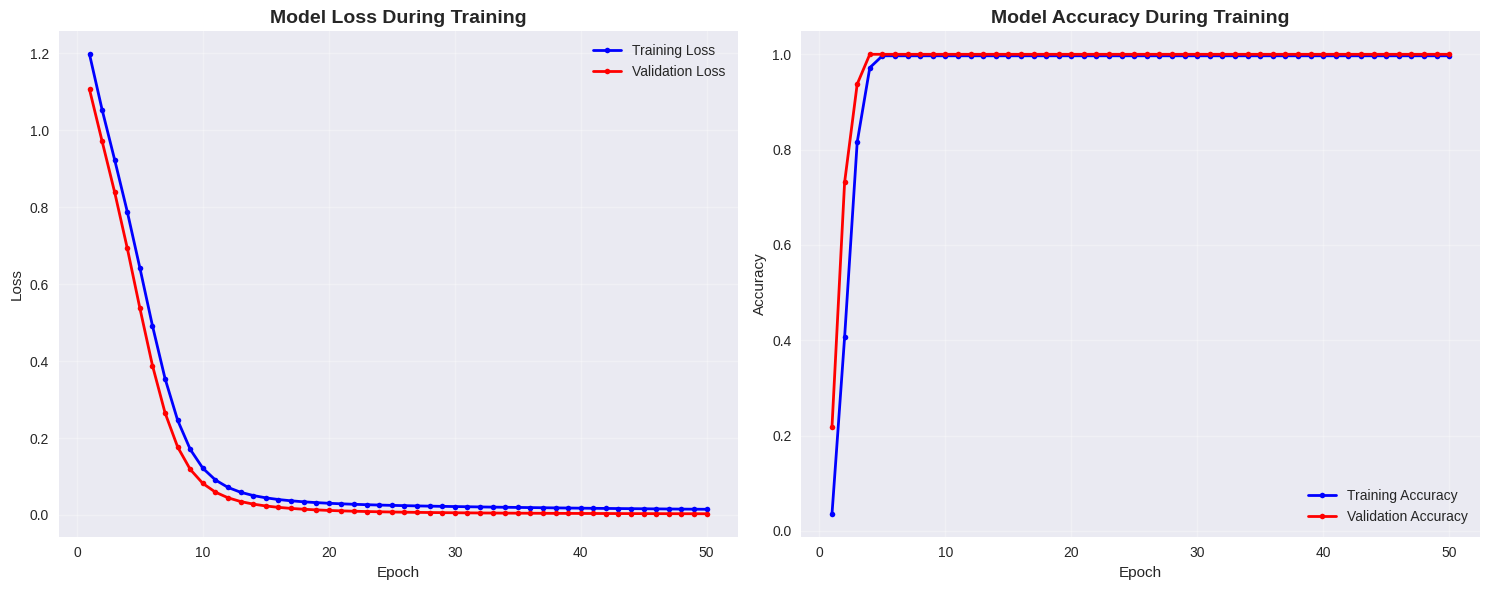

📈 Training Summary:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
Final Training Accuracy:   0.9969
Final Validation Accuracy: 1.0000
Final Training Loss:       0.0148
Final Validation Loss:     0.0031
✅ Good generalization (validation ≥ training accuracy)

🎓 What We Just Learned:
━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━
1. 📊 Created a dataset with multiple features
2. 🏗️  Built a neural network with Keras (just 3 lines!)
3. ⚙️  Compiled with optimizer, loss function, and metrics
4. 🚂 Trained the model on our data
5. 📈 Monitored training with validation data
6. 🎯 Made predictions on new data
7. 📊 Visualized the learning process


In [ ]:
# Visualize Training History
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Plot training history
epochs = range(1, len(history.history['loss']) + 1)

# Loss plot
ax1.plot(epochs, history.history['loss'], 'bo-', label='Training Loss', linewidth=2, markersize=4)
ax1.plot(epochs, history.history['val_loss'], 'ro-', label='Validation Loss', linewidth=2, markersize=4)
ax1.set_title('Model Loss During Training', fontsize=14, weight='bold')
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Loss')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Accuracy plot
ax2.plot(epochs, history.history['accuracy'], 'bo-', label='Training Accuracy', linewidth=2, markersize=4)
ax2.plot(epochs, history.history['val_accuracy'], 'ro-', label='Validation Accuracy', linewidth=2, markersize=4)
ax2.set_title('Model Accuracy During Training', fontsize=14, weight='bold')
ax2.set_xlabel('Epoch')
ax2.set_ylabel('Accuracy')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Show final training statistics
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]
final_train_loss = history.history['loss'][-1]
final_val_loss = history.history['val_loss'][-1]

print("📈 Training Summary:")
print("━" * 30)
print(f"Final Training Accuracy:   {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")
print(f"Final Training Loss:       {final_train_loss:.4f}")
print(f"Final Validation Loss:     {final_val_loss:.4f}")

# Check for overfitting
if final_train_acc - final_val_acc > 0.1:
    print("⚠️  Possible overfitting detected (training >> validation accuracy)")
elif final_val_acc > final_train_acc:
    print("✅ Good generalization (validation ≥ training accuracy)")
else:
    print("✅ Healthy learning (small gap between training and validation)")

print("\n🎓 What We Just Learned:")
print("━" * 30)
print("1. 📊 Created a dataset with multiple features")
print("2. 🏗️  Built a neural network with Keras (just 3 lines!)")
print("3. ⚙️  Compiled with optimizer, loss function, and metrics")
print("4. 🚂 Trained the model on our data")
print("5. 📈 Monitored training with validation data")
print("6. 🎯 Made predictions on new data")
print("7. 📊 Visualized the learning process")

## 🎉 Congratulations! You've Mastered Neural Networks!

![Congratulations](https://miro.medium.com/max/1400/1*OcE6s6DoMx2q2QnRCqFTHw.gif)

### 🌟 What You've Accomplished

You've successfully completed a comprehensive journey through neural networks! Here's what you've learned:

#### ✅ **Mathematical Foundations**
- 🔢 Scalars, vectors, matrices, and tensors
- 📊 Matrix operations and transposition  
- 🧮 Understanding multi-dimensional data structures

#### ✅ **Neural Network Fundamentals**
- 🧠 Network architecture (input, hidden, output layers)
- ⚡ Activation functions (sigmoid, ReLU, tanh)
- 🔗 How neurons connect and process information

#### ✅ **Optimization & Learning**  
- 📉 Gradient descent and partial derivatives
- 🏔️ Cost functions and loss minimization
- 🔄 Forward and backward propagation

#### ✅ **Practical Implementation**
- 🔧 Building networks with Keras
- 🖼️ Real-world image classification (MNIST)
- 📊 Model evaluation and performance analysis

### 🚀 Next Steps in Your AI Journey

#### **Immediate Next Steps:**
1. **🔬 Experiment More**: Try different network architectures, activation functions
2. **📖 Explore Datasets**: Work with different types of data (text, images, time series)
3. **🎯 Build Projects**: Create your own neural network applications

#### **Advanced Topics to Explore:**
- **🖼️ Convolutional Neural Networks (CNNs)**: For computer vision
- **📝 Recurrent Neural Networks (RNNs/LSTMs)**: For sequences and text
- **🤖 Transfer Learning**: Using pre-trained models
- **🎨 Generative Models**: GANs, VAEs for creating new content
- **🧠 Deep Reinforcement Learning**: For game-playing AI

#### **Recommended Resources:**
- 📚 **Books**: "Deep Learning" by Ian Goodfellow, "Hands-On Machine Learning" by Aurélien Géron
- 💻 **Online Courses**: Fast.ai, Coursera Deep Learning Specialization
- 🛠️ **Practice Platforms**: Kaggle, Google Colab, Papers With Code
- 🎓 **Communities**: Reddit r/MachineLearning, Stack Overflow, GitHub

### 💡 Key Takeaways to Remember

1. **Start Simple**: Always begin with simple models and gradually increase complexity
2. **Data is King**: Quality data is more important than complex algorithms
3. **Iterate and Experiment**: ML is experimental - try different approaches
4. **Understand Your Results**: Don't just optimize metrics, understand what your model learns
5. **Practice Regularly**: Like any skill, consistent practice makes you better

### 🎯 Final Challenge

**Try This:** Pick a dataset you're interested in (weather, sports, finance, etc.) and build a neural network to make predictions. Start simple, then gradually improve your model. Share your results with the community!

---

## 📝 Summary Cheat Sheet

### **Building a Neural Network (Quick Reference):**

```python
# 1. Import libraries
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# 2. Load and preprocess data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 3. Build model
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(features,)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
])

# 4. Compile
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5. Train
history = model.fit(X_train, y_train,
                   epochs=50,
                   validation_split=0.2)

# 6. Evaluate
model.evaluate(X_test, y_test)
```

### **Key Concepts:**
- **Gradient Descent**: Optimization algorithm that finds minimum of cost function
- **Backpropagation**: Method for calculating gradients using chain rule  
- **Activation Functions**: Add non-linearity (ReLU, sigmoid, tanh)
- **Loss Functions**: Measure prediction error (MSE, cross-entropy)
- **Overfitting**: Model memorizes training data but fails on new data

---

**🙏 Thank you for completing this comprehensive neural networks guide!**

Remember: Every expert was once a beginner. Keep learning, keep building, and keep pushing the boundaries of what's possible with AI! 🚀